# FYSS5120 Efficient Numerical Programming - Demo 4

Author: Felix Cahyadi

Creation date: 02.10.2023

Last changes: 03.10.2023 22:48

In [1]:
# import libraries
import math

### 1. Examine the MNIST hand-written number recognition routine from Tensorflow/Keras examples. There are two versions, we’ll look at https://keras.io/examples/vision/mnist_convnet with Convolution, MaxPooling, Flatten, Dropout, and Dense layers. A slightly modified code (added plotting etc.) is in the file keras_mnist.py

I have checked the code, and the keras_mnist.py has the same steps as the one in the website, hence we are going to use the code from keras_mnist.py

I made some modification on the model building part, so that it's going to look for a model file called 'demo4.keras', and load it if it exists. If it doesn't exist, the program is going to build the model, train it, and save the model as 'demo4.keras'

In [2]:
"""
 Trains a simple convnet on the MNIST dataset.
 https://keras.io/examples/vision/mnist_convnet/

"""

# Silence tensorflow import verbose messages
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# Setup
# -----
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
# Plotting
# --------

def plot_images(title,images,labels,findings=None):
    """
    title: title of the whole 5x5 plot
    images: set of images to plot, first 25 picked
    labels: set of digits the images are showing
    findings (optional): set of digits the NN thinks he images are showing
    """
    fig,axs = plt.subplots(5,5,figsize=(8,8))
    plt.suptitle(title)
    k = 0
    for i in range(5):
        for j in range(5):
            axs[i,j].axis('off')
            try:
                axs[i,j].imshow(images[k], cmap='Greys')
                
                try:
                    axs[i,j].set_title(f'{labels[k]} not {findings[k]}')
                except:
                    axs[i,j].set_title(f'{labels[k]}')
                k+=1
            except:
                pass
                
    plt.show()

In [4]:
# Model / data parameters
# -----------------------
num_classes = 10
input_shape = (28, 28, 1)

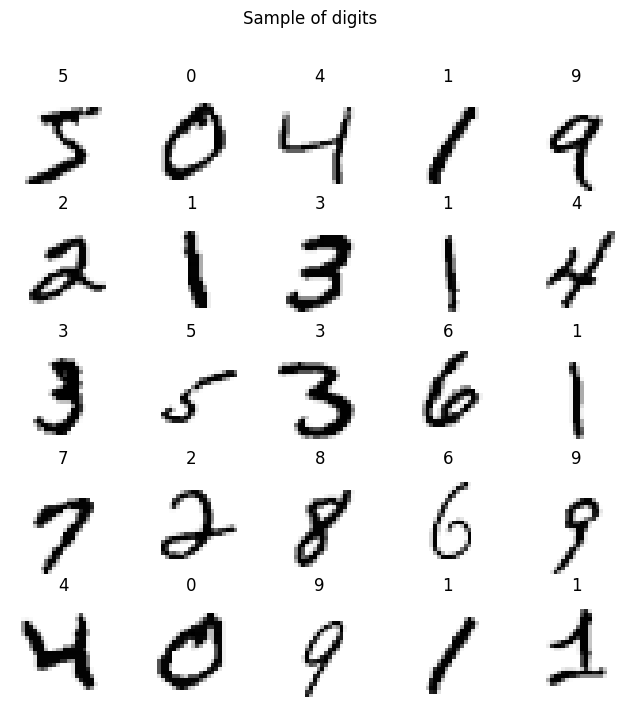

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Read in the data
# ----------------
# split between train and test sets
#
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plot_images('Sample of digits',x_train,y_train)

# Scale images to the [0, 1] range
x_train = x_train/255
x_test = x_test/255

# x shape is (:,28,28), need (:,28,28,1); add an extra dimension to the end
# images should  have shape (28, 28, 1)
x_train = x_train[...,np.newaxis] # notice the use of the ellipsis ...
x_test = x_test[...,np.newaxis]

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")



# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# retrieve or Build the model
# ---------------
try:
    # Try to look for model
    model = keras.models.load_model('demo4.keras')
    model.summary()

except:
    model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.summary()
    # Train the model
    # ---------------
    batch_size = 128
    epochs = 15

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save('demo4.keras')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [7]:
# Evaluate the trained model
# --------------------------
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026720169931650162
Test accuracy: 0.9911999702453613


### 2. What’s the purpose of these layer types?
* Convolution
* Flatten

First, we are going to answer the purpose of the convolution layer

In [8]:
# Create a function to plot images in lines
def plot_straight_imag(images, title = None, labels = None):
    # get the number of images to plot
    if images.shape[0]<5:
        nrow = 1
        ncol = images.shape[0]
    else:
        nrow = math.ceil(images.shape[0]/5)
        ncol = 5
    


    fig, axs = plt.subplots(nrows=nrow,ncols=ncol,figsize = (nrow,ncol))

    try:
        for i in range(nrow):
            for j in range(ncol):
                try:
                    axs[i,j].imshow(images[(5*i)+j],cmap = 'Greys')
                    axs[i,j].axis('off')
                except:
                    axs[i,j].axis('off')
    except:
        try:
            for i in range(ncol):
                axs[i].imshow(images[i],cmap = 'Greys')
                axs[i].axis('off')
                try:
                    axs[i].set_title(labels[i])
                except:
                    pass
        except:
            axs.imshow(images[0],cmap = 'Greys')
            axs.axis('off')
            try:
                axs.set_title(labels[0])
            except:
                pass
            
    try:
        fig.suptitle(title)
    except:
        pass
    

    plt.show()

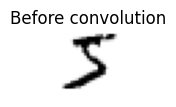

In [9]:
# we are going to test what the layers are doing
x_sample = x_train[:1] # Take the first sample from training data
plot_straight_imag(x_sample,'Before convolution')

In [10]:
conv_sample = layers.Conv2D(32,kernel_size = (3,3), activation = "relu")(x_sample)

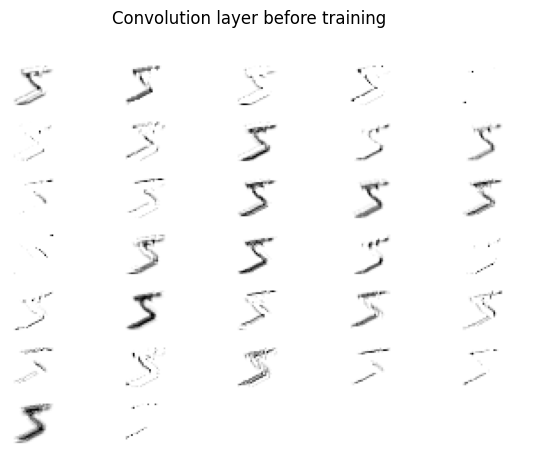

In [11]:
plot_straight_imag(np.transpose(np.array(conv_sample[0,...,:]),(2,0,1)), 'Convolution layer before training')

Here, we can see that the convolution layer applies 32 different filters to the input, each of them are shaped as 3x3 arrays. These filters are then used to produce what we call as feature maps. When first created, the filters are initialized randomly.

I think each feature maps are meant to 'separate' the feature of the input, so that the CNN can learn better based on those features.

Usually after applying filter operation, we can put it through activation function to introduce nonlinearity.

In [12]:
# Extract layer from the trained model, and apply it to our sample
trained_conv = model.get_layer('conv2d_3')(x_sample)

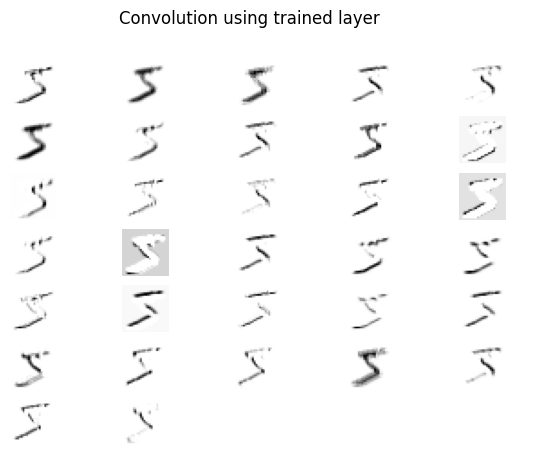

In [13]:
# Plot the result from the trained layer
plot_straight_imag(np.transpose(np.array(trained_conv[0,...,:]),(2,0,1)), 'Convolution using trained layer')

We can see that the trained layer distinguish some features better, some of them are recognizing the background, some of them recognize the edges, some of them the insides.

Next, we will discuss the flatten layer. Because the goal of this NN is to recognize numbers, we are going to pass the output from the CNN to the ANN. CNN is used to separate the features from an image, and ANN does the classification/prediction. In order to "connect" the CNN to the ANN, we need to turn the multidimensional layer to 1 dimensional layer. That's where the flatten layer comes in. In the code below, we can see that from max_pooling2d_3 with the shape of (5,5,64) into (1600)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### 3. Teach the neural network to recognize numbers 6 and 9. First, edit the keras_mnist.py code so that it uses only numbers 6 and 9 for training and testing. See, for example, how-do-i-select-... @Stackoverflow Now that the number of training data has changed, what’s a suitable batch_size?

We are going to use the code snippets from stack overflow to select 6 and 9

In [15]:
# Create a mask to select the 6s and 9s from the arrays
train_mask_69 = np.isin(np.argmax(y_train, axis=-1),[6,9])
test_mask_69 = np.isin(np.argmax(y_test, axis= -1),[6,9])

In [16]:
# Use the mask
x_train_69 = x_train[train_mask_69]
y_train_69 = np.argmax(y_train[train_mask_69],axis = -1) # we are converting it to 6s and 9s
x_test_69 = x_test[test_mask_69]
y_test_69 = np.argmax(y_test[test_mask_69],axis=-1)

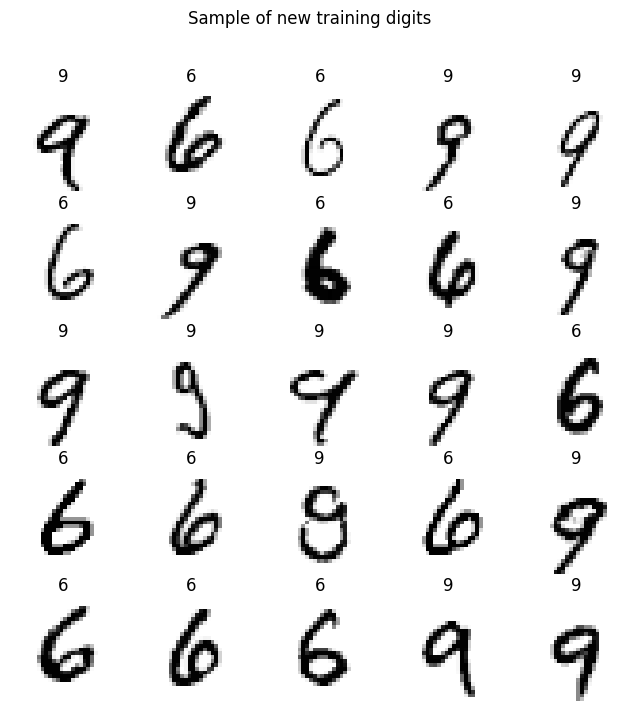

In [17]:
# Plot the new training sample
plot_images('Sample of new training digits', x_train_69,y_train_69)

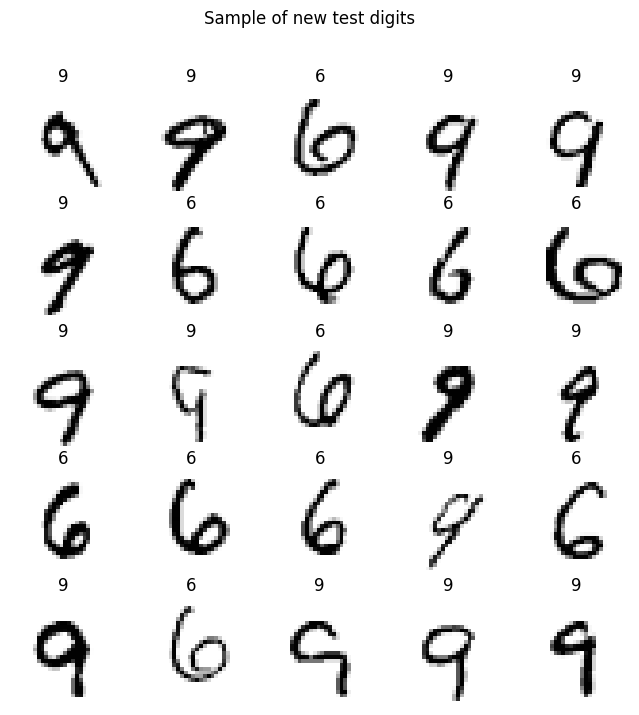

In [18]:
# Plot the new test sample
plot_images('Sample of new test digits', x_test_69,y_test_69)

We are going to prepare the data for one-hot encoding. This can be done using to_categorical

In [19]:
from tensorflow.keras.utils import to_categorical
y = [6,9,9,6,9,6,6,6,9]
to_categorical(y)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

But, as we can see from above example, there is just so much wasted memory when we only have two class category, to solve this, we are going to use scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_vec = label_encoder.fit_transform(y)
print(y_vec)

[0 1 1 0 1 0 0 0 1]


which we can put into to_categorical()

In [21]:
y_categ = to_categorical(y_vec)
print(y_categ)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


We are going to use the same process for our sample

In [22]:
# convert class vectors to binary class matrices
# y_train_69 and y_test_69 should be in form of 6s and 9s because we have converted them earlier
y_train_69 = to_categorical(label_encoder.fit_transform(y_train_69))
y_test_69 = to_categorical(label_encoder.fit_transform(y_test_69))

Look at some samples from the new binary class matrices

In [23]:
print(y_train_69[:5])
print(y_test_69[:5])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


After the data has been dealt with, we are going to modify the layers to still use one-hot encoding, but just with two output nodes, as we can see in the code below.

We are still going to use the same batch_size

In [24]:
# retrieve or Build the model
# ---------------
try:
    # Try to look for model
    model69 = keras.models.load_model('demo4_69.keras')
    model69.summary()

except:
    model69 = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"), # here we only have two output nodes
        ]
    )

    model69.summary()
    # Train the model
    # ---------------
    batch_size = 128
    epochs = 15

    model69.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model69.fit(x_train_69, y_train_69, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model69.save('demo4_69.keras')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

We are now going to evaluate the trained model

In [25]:
score69 = model69.evaluate(x_test_69, y_test_69, verbose=0)
print("Test loss:", score69[0])
print("Test accuracy:", score69[1])

Test loss: 0.0028718539979308844
Test accuracy: 0.9989832043647766


That was a high accuracy, now we are going to see where the model is wrong at

In [26]:
# Create an array of prediction
prediction69 = model69.predict(x_test_69, verbose = False)

# List the cases where the prediction is not the same as test labels
wrong_prediction = x_test_69[np.argmax(prediction69, axis = -1) !=np.argmax(y_test_69, axis = -1)]

# List the label for those cases, and revert it back to 6's and 9's using label_encoder.inverse_transform()
wrong_prediction_label = label_encoder.inverse_transform(np.argmax(y_test_69[np.argmax(prediction69, axis = -1) !=np.argmax(y_test_69, axis = -1)], axis = -1))

Plot the sample using the plotting function that I have made

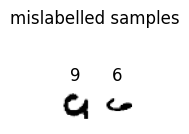

In [27]:
plot_straight_imag(wrong_prediction, title="mislabelled samples", labels= wrong_prediction_label)

We can see that those samples look a bit funny. It's understandable that the CNN got it wrong. The training is still good even though we are using the same batch size as the previous one.

We are going to try the model again, but this time with different batch_size, this time batch_size = 26, about 0.2 times the previous batch size

In [28]:
# retrieve or Build the model
# ---------------
try:
    # Try to look for model
    model69_batch = keras.models.load_model('demo4_69_batch.keras')
    model69_batch.summary()

except:
    model69_batch = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"), # here we only have two output nodes
        ]
    )

    model69_batch.summary()
    # Train the model
    # ---------------
    batch_size = 26 # New batch size, previously 128
    epochs = 15

    model69_batch.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model69_batch.fit(x_train_69, y_train_69, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model69_batch.save('demo4_69_batch.keras')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

Evaluate the trained model

In [29]:
score69_batch = model69_batch.evaluate(x_test_69, y_test_69, verbose=0)
print("Test loss:", score69_batch[0])
print("Test accuracy:", score69_batch[1])

Test loss: 0.0012299420777708292
Test accuracy: 0.9994916319847107


Turns out it gives better accuracy, see where the model got it wrong

In [30]:
# Create an array of prediction
prediction69_batch = model69_batch.predict(x_test_69, verbose = False)

# List the cases where the prediction is not the same as test labels
wrong_prediction_batch = x_test_69[np.argmax(prediction69_batch, axis = -1) !=np.argmax(y_test_69, axis = -1)]

# List the label for those cases, and revert it back to 6's and 9's using label_encoder.inverse_transform()
wrong_prediction_label_batch = label_encoder.inverse_transform(np.argmax(y_test_69[np.argmax(prediction69_batch, axis = -1) !=np.argmax(y_test_69, axis = -1)], axis = -1))

Plot it

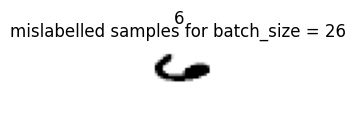

In [31]:
plot_straight_imag(wrong_prediction_batch, title = "mislabelled samples for batch_size = 26", labels = wrong_prediction_label_batch)

Turns out with smaller batch_size, we got better accuracy at the test, though not significant. The training time is slightly longer with the lower batch_size

### 4. Which images are hardest to identify? Compare the predicted labels pred_values = model.predict(x_test) with the correct ones; count the deviations and plot all or 25 first mislabelled images using plot_images().

We have acquired that the hardest images to identify are the 9 and 6 that we acquired with model69, with the 6 as the hardest.

Let's see what we got in the 1st convolution layer in model69

In [32]:
trained_conv69 = model69.get_layer('conv2d_1')(x_train_69[:1])

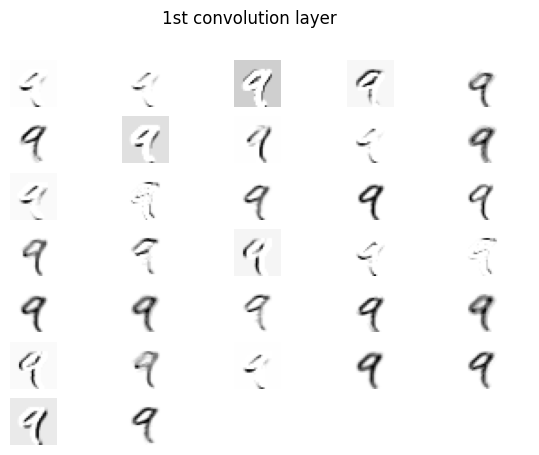

In [33]:
plot_straight_imag(np.transpose(np.array(trained_conv69[0]),(2,0,1)),'1st convolution layer')

Let's look at it when it's applied to the mislabelled image

In [34]:
mis_trained_conv69 = model69.get_layer('conv2d_1')(wrong_prediction_batch)

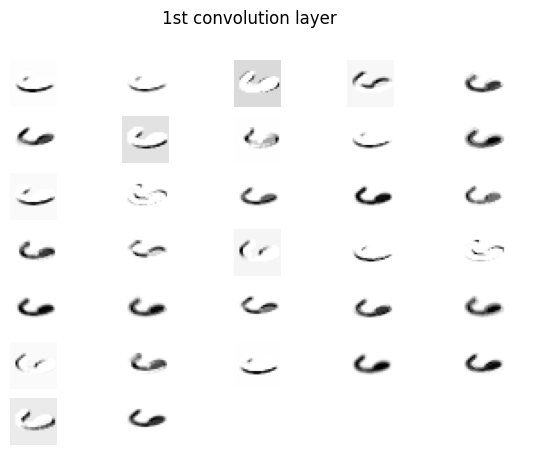

In [35]:
plot_straight_imag(np.transpose(np.array(mis_trained_conv69[0]),(2,0,1)),'1st convolution layer')

The CNN might mistake some of the features as the features of 9's